# Final Project: Statistical Analysis of Student Performance

## Project Scenario

You are a teacher conducting a study on factors influencing student performance in exams. You have obtained the "Student Performance" dataset from Kaggle, which contains information about students' demographics and their scores in different subjects. Your task is to analyze the data, identify patterns, and draw conclusions about factors affecting student performance.

Dataset Link: [Student Performance Dataset](https://www.kaggle.com/spscientist/students-performance-in-exams)

## Instructions

You are required to perform the following analyses and answer the questions using the data provided.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
data = pd.read_csv('StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# 1. Basic Statistical Analysis
Calculate the mean and standard deviation for the math score, reading score, and writing score columns.

In [4]:
# Calculate mean
math_mean = np.sum(data['math score']) / 1000
reading_mean = np.sum(data['reading score']) / 1000
writing_mean = np.sum(data['writing score']) / 1000

# Calculate standard deviation
math_std = np.sqrt((np.sum((data['math score'] - math_mean) ** 2)) / 1000)
reading_std = np.sqrt((np.sum((data['reading score'] - reading_mean) ** 2)) / 1000)
writing_std = np.sqrt((np.sum((data['writing score'] - writing_mean) ** 2)) / 1000)

print(f"Mean Math Score: {math_mean}, Std: {math_std}")
print(f"Mean Reading Score: {reading_mean}, Std: {reading_std}")
print(f"Mean Writing Score: {writing_mean}, Std: {writing_std}")

Mean Math Score: 66.089, Std: 15.155496659628149
Mean Reading Score: 69.169, Std: 14.592890015346516
Mean Writing Score: 68.054, Std: 15.188057281956768


# 2. Probabilities

Calculate the probability that a student is Male or has a Math_Score above 80.

In [5]:
# Calculate probabilities
p_male = (len(data[data['gender'] == 'male'])) / 1000
p_math_above_80 = (len(data[data['math score'] > 80])) / 1000
p_male_and_math_above_80 = p_male * p_math_above_80

# Union probability
p_union = p_male + p_math_above_80 - p_male_and_math_above_80
print(f"Probability of Male or Math Score > 80: {p_union}")

Probability of Male or Math Score > 80: 0.5731679999999999


Calculate the probability that a student is Male and has a Math_Score above 80.

In [6]:
# Calculate probabilities
p_male = (len(data[data['gender'] == 'male'])) / 1000
p_math_above_80 = (len(data[data['math score'] > 80])) / 1000
p_male_and_math_above_80 = p_male * p_math_above_80

# Union probability
p_intersection = p_male * p_math_above_80
print(f"Probability of Male and Math Score > 80: {p_intersection}")

Probability of Male and Math Score > 80: 0.08483199999999999


### Bayes' Theorem
Calculate the probability that a student is Male given they have a Math_Score above 80.

In [7]:
# Calculate conditional probability using Bayes' theorem
p_male = (len(data[data['gender'] == 'male'])) / 1000
p_math_above_80 = (len(data[data['math score'] > 80])) / 1000

p_male_given_math_above_80 = (p_math_above_80 * p_male * p_male) / p_math_above_80
print(f"Probability of Male given Math Score > 80: {p_male_given_math_above_80}")

Probability of Male given Math Score > 80: 0.232324


# 3. Normal Distribution
Check Normality
Use QQ plot, histogram, and Shapiro-Wilk test to check if Math_Score is normally distributed.

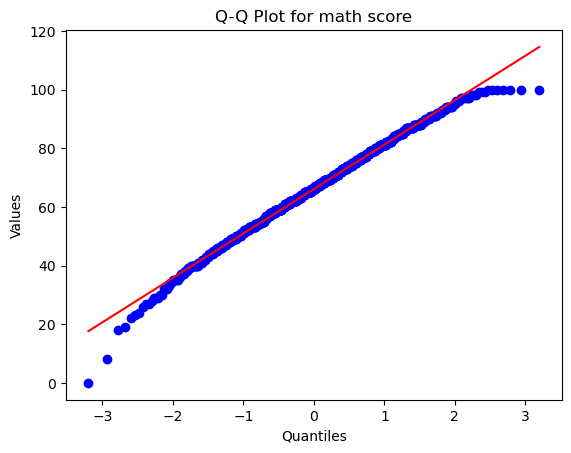

In [21]:
# QQ plot

stats.probplot(data['math score'], dist="norm", plot=plt)
plt.title('Q-Q Plot for math score')
plt.xlabel('Quantiles')
plt.ylabel('Values')
plt.show()

c:\Users\epic\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Frequency')

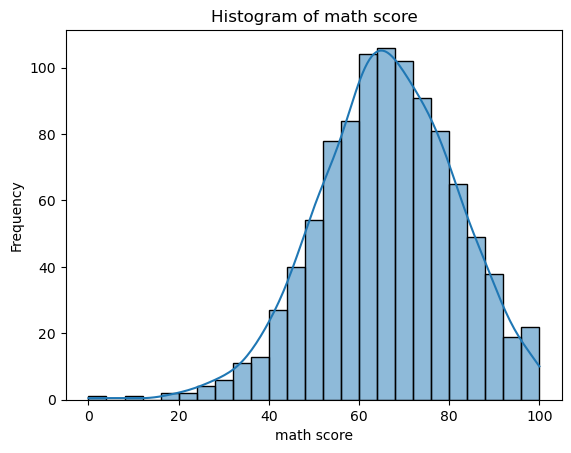

In [22]:
# Histogram

sns.histplot(data['math score'], kde=True)
plt.title('Histogram of math score')
plt.xlabel('math score')
plt.ylabel('Frequency')

In [10]:
# Shapiro-Wilk test
from scipy.stats import shapiro

statistic, p_value = shapiro(data['math score'])
print(f"Shapiro-Wilk Test for Math Score: Statistic = {statistic}, p-value = {p_value}")

print(f"T-statistic: {statistic}, p-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. math score is normally distributed.")
else:
    print("Fail to reject the null hypothesis. math score is not normally distributed.")

Shapiro-Wilk Test for Math Score: Statistic = 0.9931488633155823, p-value = 0.000144938996527344
T-statistic: 0.9931488633155823, p-value: 0.000144938996527344
Reject the null hypothesis. math score is normally distributed.


# 4. Z-Score and Noise Removal

Calculate the z-scores for the Math_Score column and remove noise (more than 95%).


In [11]:
# Calculate z-scores
math_mean = np.sum(data['math score']) / 1000
math_std = np.sqrt((np.sum((data['math score'] - math_mean) ** 2)) / 1000)
data['Math_Score_z'] = (data['math score'] - math_mean) / math_std

# Remove noise

cleaned_data = data[data['Math_Score_z'].between(-2,2)]

print(f"Original data size: {data.shape}")
print(f"Cleaned data size: {cleaned_data.shape}")

Original data size: (1000, 9)
Cleaned data size: (954, 9)


# 5. Visualizations
Generate different plots (box, histogram, scatter, pie) to visualize Math Score column before and after removing noise.

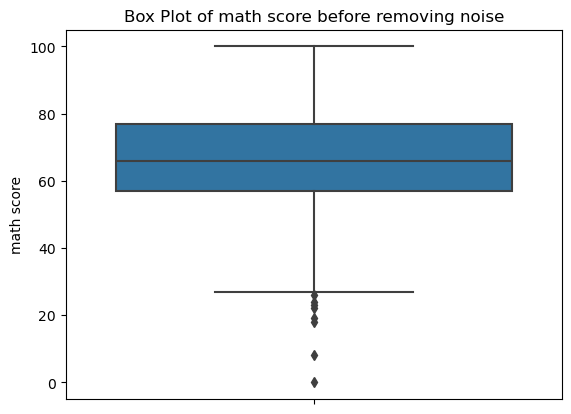

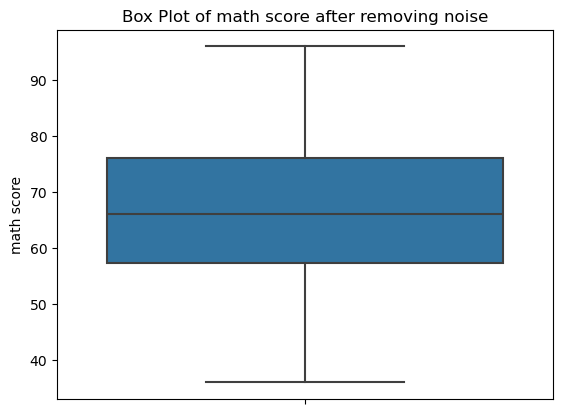

In [12]:
# Box plot

sns.boxplot(y='math score', data=data)
plt.title('Box Plot of math score before removing noise')
plt.ylabel('math score')
plt.show()

sns.boxplot(y='math score', data=cleaned_data)
plt.title('Box Plot of math score after removing noise')
plt.ylabel('math score')
plt.show()


c:\Users\epic\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


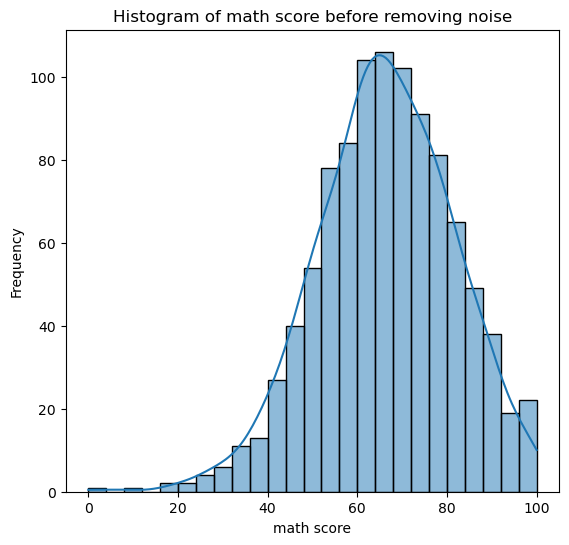

c:\Users\epic\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


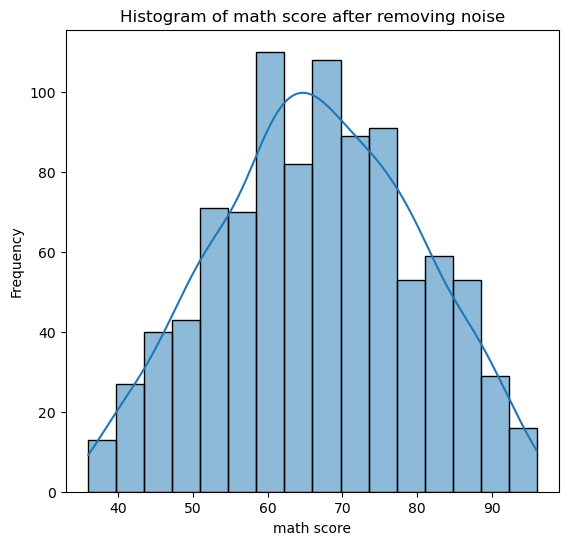

In [13]:
# Histogram

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['math score'], kde=True)
plt.title('Histogram of math score before removing noise')
plt.xlabel('math score')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 2)
sns.histplot(cleaned_data['math score'], kde=True)
plt.title('Histogram of math score after removing noise')
plt.xlabel('math score')
plt.ylabel('Frequency')
plt.show()

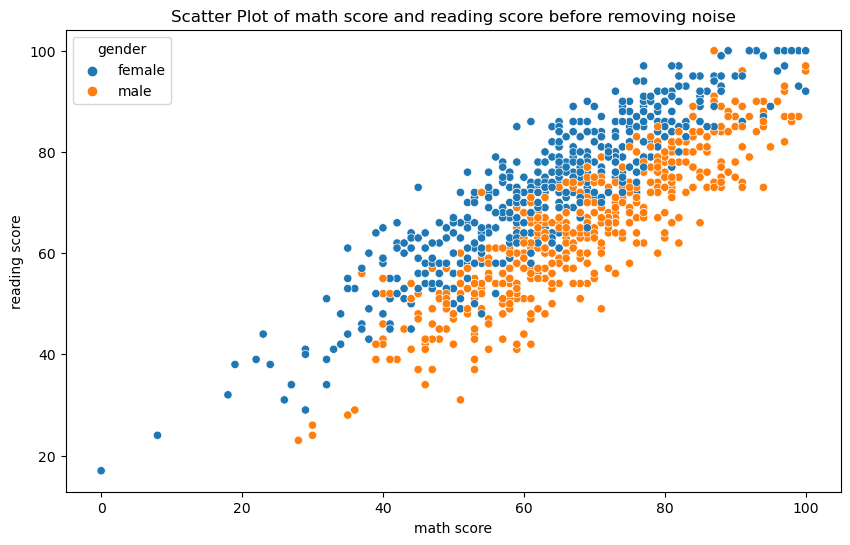

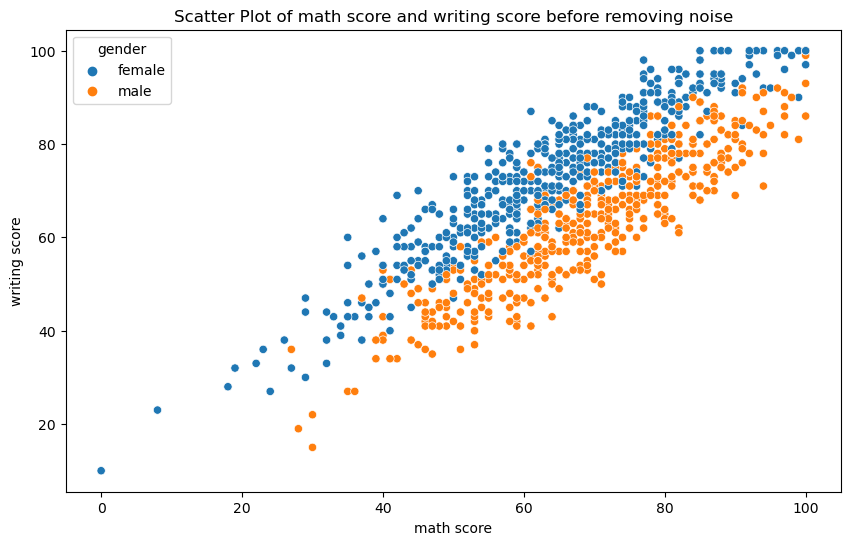

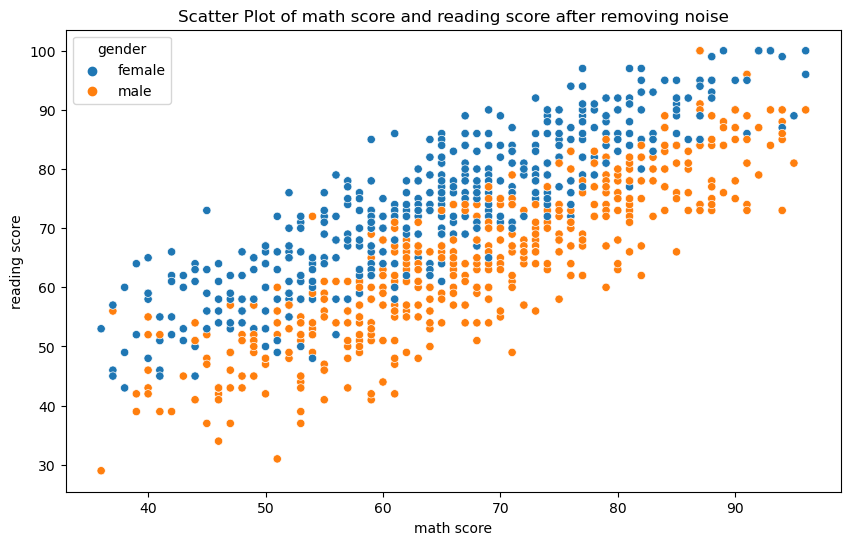

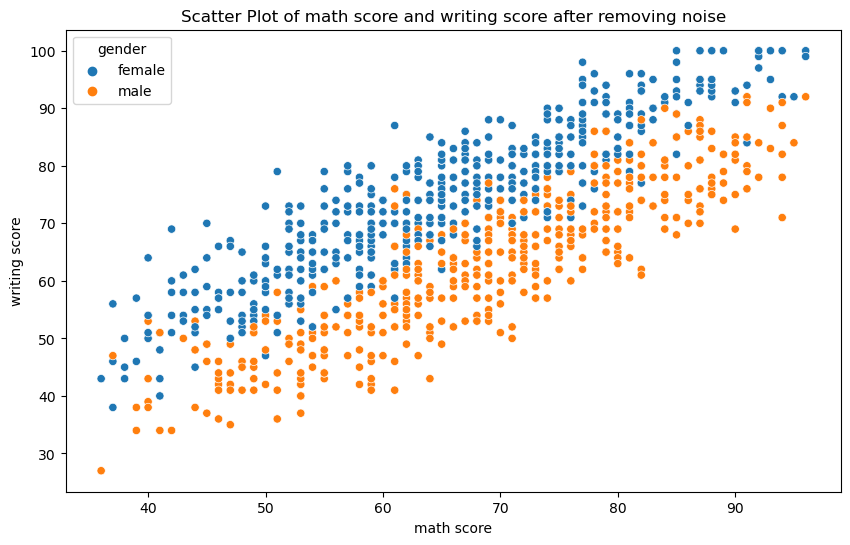

In [14]:
# Scatter plot

plt.figure(figsize=(10, 6))
sns.scatterplot(x='math score', y='reading score', hue='gender', data=data)
plt.title('Scatter Plot of math score and reading score before removing noise')
plt.xlabel('math score')
plt.ylabel('reading score')
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(x='math score', y='writing score', hue='gender', data=data)
plt.title('Scatter Plot of math score and writing score before removing noise')
plt.xlabel('math score')
plt.ylabel('writing score')
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(x='math score', y='reading score', hue='gender', data=cleaned_data)
plt.title('Scatter Plot of math score and reading score after removing noise')
plt.xlabel('math score')
plt.ylabel('reading score')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='math score', y='writing score', hue='gender', data=cleaned_data)
plt.title('Scatter Plot of math score and writing score after removing noise')
plt.xlabel('math score')
plt.ylabel('writing score')
plt.show()

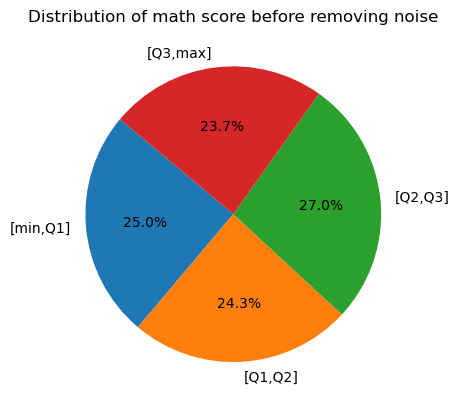

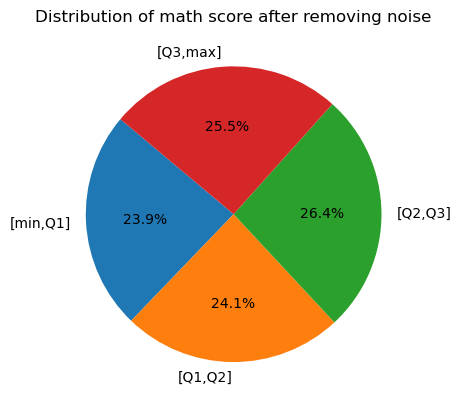

In [15]:
# Pie chart
sort_math_score_with_noise = data['math score'].sort_values()
math_median = np.median(sort_math_score_with_noise)
math_max = np.max(sort_math_score_with_noise)
math_min = np.min(sort_math_score_with_noise)
q1 = np.percentile(sort_math_score_with_noise, 25)
q3 = np.percentile(sort_math_score_with_noise, 75)

qu1 = len(data[data['math score'].between(math_min,q1)])
qu2 = len(data[data['math score'].between(q1,math_median)])
qu3 = len(data[data['math score'].between(math_median,q3)])
qu4 = len(data[data['math score'].between(q3,math_max)])
li = [qu1, qu2, qu3, qu4]

quantiles_with_noise = pd.Series(data=li, index=['[min,Q1]', '[Q1,Q2]','[Q2,Q3]', '[Q3,max]'])

plt.pie(quantiles_with_noise, labels=quantiles_with_noise.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of math score before removing noise')
plt.show()


sort_math_score_clean_data = cleaned_data['math score'].sort_values()
math_median = np.median(sort_math_score_clean_data)
math_max = np.max(sort_math_score_clean_data)
math_min = np.min(sort_math_score_clean_data)
q1 = np.percentile(sort_math_score_clean_data, 25)
q3 = np.percentile(sort_math_score_clean_data, 75)

qu1 = len(cleaned_data[cleaned_data['math score'].between(math_min,q1)])
qu2 = len(cleaned_data[cleaned_data['math score'].between(q1,math_median)])
qu3 = len(cleaned_data[cleaned_data['math score'].between(math_median,q3)])
qu4 = len(cleaned_data[cleaned_data['math score'].between(q3,math_max)])
li = [qu1, qu2, qu3, qu4]

quantiles_clean_data = pd.Series(data=li, index=['[min,Q1]', '[Q1,Q2]','[Q2,Q3]', '[Q3,max]'])

plt.pie(quantiles_clean_data, labels=quantiles_clean_data.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of math score after removing noise')
plt.show()


# 6. Parametric Hypothesis Testing

### Two samples
Perform a two-sample hypothesis test to compare the Math_Score between Male and Female students. (use cleaned data and choose  appropriate test)

In [17]:
from scipy.stats import ttest_ind

male_math_score = cleaned_data[cleaned_data['gender'] == 'male']['math score']
female_math_score = cleaned_data[cleaned_data['gender'] == 'female']['math score']

t_statistic, p_value = ttest_ind(male_math_score, female_math_score)
print(f"T-statistic: {t_statistic}, p-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in mean math score between male and female.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in mean math score between male and female.")

T-statistic: 4.384844297739353, p-value: 1.2899664913401747e-05
Reject the null hypothesis. There is a significant difference in mean math score between male and female.


### 3 Samples or More
Perform an hypothesis test to compare the Math_Score across different ethnicities.

In [18]:
from scipy.stats import f_oneway
A = cleaned_data[cleaned_data['race/ethnicity'] == 'group A']['math score']
B = cleaned_data[cleaned_data['race/ethnicity'] == 'group B']['math score']
C = cleaned_data[cleaned_data['race/ethnicity'] == 'group C']['math score']

t_statistic, p_value = f_oneway(A,B,C)
print(f"T-statistic: {t_statistic}, p-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in mean math score between group A, group B and group C.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in mean math score between group A, group B and group C.")


T-statistic: 3.27526430952839, p-value: 0.03852214226481048
Reject the null hypothesis. There is a significant difference in mean math score between group A, group B and group C.


# 7. Confidence Interval

Calculate a 95% confidence interval for the mean Math_Score.

95% Confidence interval for mean Math Score: (65.69544100277639, 67.37583782321943)


c:\Users\epic\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


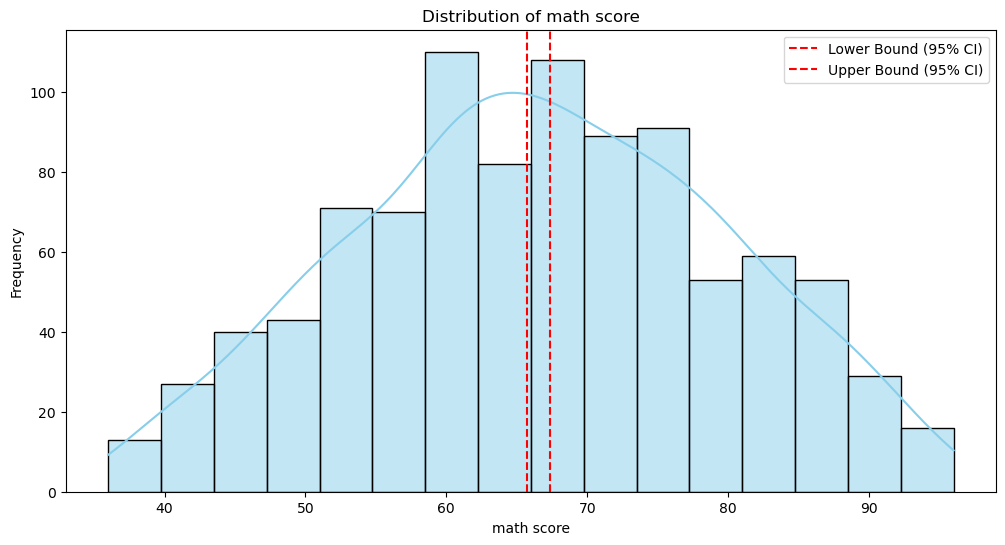

In [19]:
math_score_data = cleaned_data['math score']
math_score_mean = np.mean(math_score_data)
math_score_std = np.std(math_score_data)
confidence_range = .95
z_score = stats.norm.ppf(1 - (1 - confidence_range) / 2)
error = math_score_std / np.sqrt(len(math_score_data))

lower_bound = math_score_mean - z_score * error
upper_bound = math_score_mean + z_score * error

confidence_interval = (lower_bound, upper_bound)
print(f"95% Confidence interval for mean Math Score: {confidence_interval}")

plt.figure(figsize=(12, 6))
sns.histplot(math_score_data, kde=True, color='skyblue')
plt.axvline(x=lower_bound, color='red', linestyle='--', label='Lower Bound (95% CI)')
plt.axvline(x=upper_bound, color='red', linestyle='--', label='Upper Bound (95% CI)')
plt.title('Distribution of math score')
plt.xlabel('math score')
plt.ylabel('Frequency')
plt.legend()
plt.show()